# Business Centric Insights of Online Hospitality Market Data in the Seatle Area

 # 1. Introduction & Data Gathering
    Abstract: In this project, we will be analyzing a series of data sets provided by Kaggle of AirBnB listings in the Seattle area. Our goal will be to first, forumlate questions based on what information is provided in the dataset. Then we will clean up the data so it can be ultizlied for our ends, finally allowing us to provide insights from the data set into potential answers to our questions.
    
    To begin with, we will download all our data to this Juptyr notebook and proceed to take a look at it in various ways to understand what we could potentially discover. We will take a look at the set's headers, columns and shapes.

In [47]:
import seaborn as sns
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_35fd6d9c8a7d43ee96101400fb522263 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='s9CPbHB5nwJRDCQH2R4M-MUbrhoNCpGTPlS_zWVROG9v',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_35fd6d9c8a7d43ee96101400fb522263.get_object(Bucket='udacity9-donotdelete-pr-c5hwtduszw10xt',Key='calendar.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

calender = pd.read_csv(body)
calender.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [2]:
calender.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [3]:
calender.shape

(1393570, 4)

In [4]:

body = client_35fd6d9c8a7d43ee96101400fb522263.get_object(Bucket='udacity9-donotdelete-pr-c5hwtduszw10xt',Key='listings.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

listings = pd.read_csv(body)
listings.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [6]:
listings.shape

(3818, 92)

In [7]:

body = client_35fd6d9c8a7d43ee96101400fb522263.get_object(Bucket='udacity9-donotdelete-pr-c5hwtduszw10xt',Key='reviews.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

reviews = pd.read_csv(body)
reviews.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [8]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [9]:
reviews.shape

(84849, 6)

 # 2. Inital Thoughts and Question Formulation
     Based on the inital looks through our data, it seems clear that our treasure trove of data is going to be in the listings data set, and as thus we will focus exclusviely on it. For a more complex project and potential expansion, it would be great to add in the reviews data set to run a sentiment analysis on comments to see if there are any connections to other factors, but for now, lacking sentiment analysis tools, we will pass on the reviews data set as well as the calender data set.
     This leaves us with the great deal of columns within the listings data sets, and based on potential relationships within the columns, I have devised the following questions:
     
     1. How does one being a "SuperHost" affect the response and acceptance rates? If one is to act as AirBnB, they should understand what value exists for them in having SuperHosts. Are they intrinsically more valuable? They are, then AirBnB should focus on pleasing them and continuing to encourage them to host. If not, AirBnb will not have to placate demanding hosts, and can focus more on pleasing the consumer rather than the client.
     
     2. What is the relationship between the zipcodes of Seattle and its respective prices? Are there certain areas of the city that are higher priced and AirBnB should focus more so on advertising for, because more people will want to stay there and thus create additional revenues for the company?
     
     3. What is the overall relationship between the different factors of the AirBnb reviewing system? Is there a point in the way they divide up the reviews or do more often than not the reviews fall in line with the average? Assuming higher reviews lead to an increase in the number of times a place is rented out, it is to AirBnb's advantage to inflate the reviews however they can as Netflix has done in the past in order to drive an better perception of the brand. Can we do this here?
     
     These will be the  questions we will be tackling within our journey. In order to move forward now, we will clean through the listings data set to truly see if we have the correct data to come to these conclusions.
     
 # 3. Data Cleaning

In [10]:
#We will purge all the unessecary data columns to add to the easy of working with the data. Columns to be included are:
'''
'id,''number_of_reviews','first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
        'zipcode', 'market', 'price'
'''

"\n'id,''number_of_reviews','first_review', 'last_review', 'review_scores_rating',\n       'review_scores_accuracy', 'review_scores_cleanliness',\n       'review_scores_checkin', 'review_scores_communication',\n       'review_scores_location', 'review_scores_value',\n        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',\n        'zipcode', 'market', 'price'\n"

In [11]:
listings_clean = listings[['id','number_of_reviews','first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
        'zipcode', 'market', 'price']]
listings_clean.head()

,id,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_response_rate,host_acceptance_rate,host_is_superhost,zipcode,market,price
0,241032,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,96%,100%,f,98119,Seattle,$85.00
1,953595,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,98%,100%,t,98119,Seattle,$150.00
2,3308979,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,67%,100%,f,98119,Seattle,$975.00
3,7421966,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,98119,Seattle,$100.00
4,278830,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,100%,NaN,f,98119,Seattle,$450.00


In [12]:
# Now, with our data cleaning, we will search for NaN values in our columns of interest
listings_clean.isna().sum()

id                               0
number_of_reviews                0
first_review                   627
last_review                    627
review_scores_rating           647
review_scores_accuracy         658
review_scores_cleanliness      653
review_scores_checkin          658
review_scores_communication    651
review_scores_location         655
review_scores_value            656
host_response_rate             523
host_acceptance_rate           773
host_is_superhost                2
zipcode                          7
market                           0
price                            0
dtype: int64

In [13]:
#Let's experiment with purging all NaN values to see if it will drastically reduce our information, or if many of the rows with NaN values in one column overlap with another,
# which is what we should expect by a quick look at row 3 in the above header. We will define our problem by saying that if ~66% of the data survives in a NaN data purge, 
# then we should work with it, as it is leaving enough to resemble the original data set
list_no_nan = listings_clean.dropna(how='any',axis=0)
#Confimring it worked
list_no_nan.isna().sum()

id                             0
number_of_reviews              0
first_review                   0
last_review                    0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
zipcode                        0
market                         0
price                          0
dtype: int64

In [14]:
#Gathering info on the data set after our transformation
list_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2669 entries, 0 to 3814
Data columns (total 17 columns):
id                             2669 non-null int64
number_of_reviews              2669 non-null int64
first_review                   2669 non-null object
last_review                    2669 non-null object
review_scores_rating           2669 non-null float64
review_scores_accuracy         2669 non-null float64
review_scores_cleanliness      2669 non-null float64
review_scores_checkin          2669 non-null float64
review_scores_communication    2669 non-null float64
review_scores_location         2669 non-null float64
review_scores_value            2669 non-null float64
host_response_rate             2669 non-null object
host_acceptance_rate           2669 non-null object
host_is_superhost              2669 non-null object
zipcode                        2669 non-null object
market                         2669 non-null object
price                          2669 non-null object
dtyp

In [15]:
print(list_no_nan.shape[0] / (listings.shape[0]))

0.6990570979570456


We can see that after our transformation in which we removed all the null values, we still have maintained roughly 70 percent of the inital data set. This is acceptable and translates as there were enough overlap between null data in columns than in rows that we should accept our losses to work with over two thirds of the inital data as put forward above. 

Let us continue to explore the data now and see what other prominit features stand out to us that we may want to clean before we begin our analysis of the data

In [16]:
list_no_nan.head()

,id,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_response_rate,host_acceptance_rate,host_is_superhost,zipcode,market,price
0,241032,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,96%,100%,f,98119,Seattle,$85.00
1,953595,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,98%,100%,t,98119,Seattle,$150.00
2,3308979,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,67%,100%,f,98119,Seattle,$975.00
6,1909058,58,2014-01-27,2015-12-07,99.0,10.0,10.0,10.0,10.0,10.0,10.0,100%,100%,t,98119,Seattle,$80.00
7,856550,173,2013-01-03,2016-01-01,97.0,10.0,10.0,10.0,10.0,9.0,10.0,100%,100%,t,98119,Seattle,$60.00


Several things stick out to us from both this header and the above look at our column's data types.
    
    1. We may have some concern about our date formating in the 'first_review' and 'last_review' columns.
    
    2. 'host_response_rate', 'host_acceptance_rate' and 'price' are all numerical values that are encoded as strings, which might make analysis difficult depending on the method we choose.
    
    3. 'host_is_superhost' should just be encoded with 't' or 'f' to let us know whether or not the are a superhost. This being categorical data would need to be one-hot-encoded if we needed to run a machine learning model on it
    
    4. What values are included in zipcode should be essential to find out, as well as the distrubtion of data from each zipcode, as if we have an overwhelming amount of data from indivdual zipcodes, our entire results could be skewed.

# 3.1 What Further Actions Do We Plan on Taking?

As we have now defined 4 potential action points to take, we should pit their viability against the path we plan on taking for our analysis, to see which actionable points will be the right ones for us. Going over each one:

    1. For now, I believe it privy to leave this column as it is, right now the date shouldn't affect the graphs and charts that we are planning to make. As we are not planning on running a time series analysis, we can leave this problem as it is.
    
    2. This is a problem that may or may not be a problem in the future. For now, I will leave the percentages encoded as strings and attempt to run my analysis with them acting as such. If it is nessecary, I will parse the '%' & money values from the strings to turn them into ints. If I choose to do, you will see a section at the end of the data cleaning step where I perform this task with notes as to why I went back to redo it.
    
    3. While we are not running a machine learning model, and thus have no reason now to one-hot-encode these values, we should run a quick check to ensure that there are only 't' and 'f' values, rather than anything else that could potentially mess up our analysis.
    
    4. In the same vein as above, we should check all the values of our zipcode column and the frequency at which they appear, so that we can include that information to our analysis and not make assumptions that are only true for specific zip codes rather than the whole of Seattle. We should also extend this by ensuring all the data is actually in Seattle with the 'market' column.
    
    

In [17]:
#Checking now for the veracity of data in the (3) problem: the 'superhost' column
list_no_nan['host_is_superhost'].value_counts()

f    1971
t     698
Name: host_is_superhost, dtype: int64

Great! We have confirmed that only True and False values exist for this column!

In [18]:
#Checking now for the veracity of data in the (4) problem: starting with the 'zipcode' column
list_no_nan['zipcode'].value_counts()

98122        297
98103        279
98102        228
98101        164
98121        158
98105        146
98144        145
98107        132
98117        125
98115        124
98118        121
98109        119
98112        110
98119         96
98104         76
98116         72
98108         45
98125         41
98199         40
98106         38
98126         36
98136         31
98133         27
98177         10
98134          3
98178          3
98146          2
99\n98122      1
Name: zipcode, dtype: int64

Ah! Here we can see that not only is there serveral zipcodes with a dearth of information, having values as low as 3 and 1, but there is one misrepresented value. While it seems safe to assume that there was an encoding error, and this is another value of the highly prominent '98122' zipcode, for safety we will make that assumption rather than deleting it.

In [19]:
#Changing value of broken zipcode
list_zip_fix = list_no_nan.replace('99\n98122', '98122')
list_zip_fix['zipcode'].value_counts()

98122    298
98103    279
98102    228
98101    164
98121    158
98105    146
98144    145
98107    132
98117    125
98115    124
98118    121
98109    119
98112    110
98119     96
98104     76
98116     72
98108     45
98125     41
98199     40
98106     38
98126     36
98136     31
98133     27
98177     10
98134      3
98178      3
98146      2
Name: zipcode, dtype: int64

In [20]:
#Sucess! Let us try the same for the 'market' column
list_zip_fix['market'].value_counts()

Seattle    2669
Name: market, dtype: int64

In [21]:
#After trying to run analysis the first time, it has become clear that we need to strip the money and percentage signs off of the values in problem (2), 
# we will now proceed to do that through a reusable function
def obj_to_flt(data_set, remove, col):
    for f in range(len(data_set)):
        print(f)
        missing_or_unknown_values = data_set.iloc[f][col]
        print(missing_or_unknown_values)
        miss = missing_or_unknown_values.strip(remove)
        print(miss)
        data_set.iloc[f, data_set.columns.get_loc(col)] = miss
        print(data_set.iloc[f, data_set.columns.get_loc(col)])
    data_set[col] = data_set[col].astype(float)
    return data_set

In [22]:
#call it for the 3 columns we want to use, price, acceptance, response
list_price_fix = obj_to_flt(list_zip_fix,'$','price')
list_accpt_fix = obj_to_flt(list_price_fix,'%','host_acceptance_rate')
list_resp_fix = obj_to_flt(list_accpt_fix,'%','host_response_rate')

0
$85.00
85.00
85.00
1
$150.00
150.00
150.00
2
$975.00
975.00
975.00
3
$80.00
80.00
80.00
4
$60.00
60.00
60.00
5
$150.00
150.00
150.00
6
$95.00
95.00
95.00
7
$99.00
99.00
99.00
8
$245.00
245.00
245.00
9
$165.00
165.00
165.00
10
$461.00
461.00
461.00
11
$109.00
109.00
109.00
12
$66.00
66.00
66.00
13
$99.00
99.00
99.00
14
$110.00
110.00
110.00
15
$99.00
99.00
99.00
16
$450.00
450.00
450.00
17
$450.00
450.00
450.00
18
$45.00
45.00
45.00
19
$300.00
300.00
300.00
20
$80.00
80.00
80.00
21
$175.00
175.00
175.00
22
$325.00
325.00
325.00
23
$175.00
175.00
175.00
24
$222.00
222.00
222.00
25
$159.00
159.00
159.00
26
$125.00
125.00
125.00
27
$45.00
45.00
45.00
28
$150.00
150.00
150.00
29
$80.00
80.00
80.00
30
$110.00
110.00
110.00
31
$148.00
148.00
148.00
32
$150.00
150.00
150.00
33
$150.00
150.00
150.00
34
$100.00
100.00
100.00
35
$110.00
110.00
110.00
36
$130.00
130.00
130.00
37
$99.00
99.00
99.00
38
$145.00
145.00
145.00
39
$80.00
80.00
80.00
40
$95.00
95.00
95.00
41
$85.00
85.00
85.00
42
$90.0

$40.00
40.00
40.00
384
$99.00
99.00
99.00
385
$45.00
45.00
45.00
386
$75.00
75.00
75.00
387
$99.00
99.00
99.00
388
$225.00
225.00
225.00
389
$85.00
85.00
85.00
390
$335.00
335.00
335.00
391
$90.00
90.00
90.00
392
$111.00
111.00
111.00
393
$141.00
141.00
141.00
394
$85.00
85.00
85.00
395
$775.00
775.00
775.00
396
$95.00
95.00
95.00
397
$170.00
170.00
170.00
398
$65.00
65.00
65.00
399
$88.00
88.00
88.00
400
$125.00
125.00
125.00
401
$145.00
145.00
145.00
402
$275.00
275.00
275.00
403
$60.00
60.00
60.00
404
$95.00
95.00
95.00
405
$140.00
140.00
140.00
406
$250.00
250.00
250.00
407
$225.00
225.00
225.00
408
$65.00
65.00
65.00
409
$78.00
78.00
78.00
410
$59.00
59.00
59.00
411
$55.00
55.00
55.00
412
$129.00
129.00
129.00
413
$65.00
65.00
65.00
414
$160.00
160.00
160.00
415
$95.00
95.00
95.00
416
$85.00
85.00
85.00
417
$99.00
99.00
99.00
418
$73.00
73.00
73.00
419
$170.00
170.00
170.00
420
$48.00
48.00
48.00
421
$90.00
90.00
90.00
422
$82.00
82.00
82.00
423
$105.00
105.00
105.00
424
$75.00
75

60.00
731
$85.00
85.00
85.00
732
$70.00
70.00
70.00
733
$115.00
115.00
115.00
734
$90.00
90.00
90.00
735
$80.00
80.00
80.00
736
$149.00
149.00
149.00
737
$250.00
250.00
250.00
738
$69.00
69.00
69.00
739
$40.00
40.00
40.00
740
$60.00
60.00
60.00
741
$79.00
79.00
79.00
742
$100.00
100.00
100.00
743
$76.00
76.00
76.00
744
$95.00
95.00
95.00
745
$100.00
100.00
100.00
746
$137.00
137.00
137.00
747
$38.00
38.00
38.00
748
$557.00
557.00
557.00
749
$160.00
160.00
160.00
750
$179.00
179.00
179.00
751
$41.00
41.00
41.00
752
$99.00
99.00
99.00
753
$149.00
149.00
149.00
754
$199.00
199.00
199.00
755
$157.00
157.00
157.00
756
$170.00
170.00
170.00
757
$85.00
85.00
85.00
758
$299.00
299.00
299.00
759
$95.00
95.00
95.00
760
$99.00
99.00
99.00
761
$114.00
114.00
114.00
762
$311.00
311.00
311.00
763
$100.00
100.00
100.00
764
$150.00
150.00
150.00
765
$135.00
135.00
135.00
766
$110.00
110.00
110.00
767
$75.00
75.00
75.00
768
$138.00
138.00
138.00
769
$120.00
120.00
120.00
770
$95.00
95.00
95.00
771
$95.

89.00
89.00
1080
$175.00
175.00
175.00
1081
$144.00
144.00
144.00
1082
$188.00
188.00
188.00
1083
$179.00
179.00
179.00
1084
$129.00
129.00
129.00
1085
$170.00
170.00
170.00
1086
$135.00
135.00
135.00
1087
$150.00
150.00
150.00
1088
$140.00
140.00
140.00
1089
$121.00
121.00
121.00
1090
$147.00
147.00
147.00
1091
$149.00
149.00
149.00
1092
$300.00
300.00
300.00
1093
$115.00
115.00
115.00
1094
$129.00
129.00
129.00
1095
$175.00
175.00
175.00
1096
$220.00
220.00
220.00
1097
$90.00
90.00
90.00
1098
$120.00
120.00
120.00
1099
$325.00
325.00
325.00
1100
$127.00
127.00
127.00
1101
$168.00
168.00
168.00
1102
$117.00
117.00
117.00
1103
$85.00
85.00
85.00
1104
$122.00
122.00
122.00
1105
$142.00
142.00
142.00
1106
$237.00
237.00
237.00
1107
$99.00
99.00
99.00
1108
$110.00
110.00
110.00
1109
$225.00
225.00
225.00
1110
$99.00
99.00
99.00
1111
$65.00
65.00
65.00
1112
$183.00
183.00
183.00
1113
$110.00
110.00
110.00
1114
$156.00
156.00
156.00
1115
$169.00
169.00
169.00
1116
$150.00
150.00
150.00
1117

$50.00
50.00
50.00
1410
$25.00
25.00
25.00
1411
$49.00
49.00
49.00
1412
$129.00
129.00
129.00
1413
$42.00
42.00
42.00
1414
$299.00
299.00
299.00
1415
$99.00
99.00
99.00
1416
$175.00
175.00
175.00
1417
$120.00
120.00
120.00
1418
$56.00
56.00
56.00
1419
$55.00
55.00
55.00
1420
$235.00
235.00
235.00
1421
$60.00
60.00
60.00
1422
$67.00
67.00
67.00
1423
$95.00
95.00
95.00
1424
$115.00
115.00
115.00
1425
$50.00
50.00
50.00
1426
$199.00
199.00
199.00
1427
$86.00
86.00
86.00
1428
$175.00
175.00
175.00
1429
$55.00
55.00
55.00
1430
$68.00
68.00
68.00
1431
$60.00
60.00
60.00
1432
$90.00
90.00
90.00
1433
$139.00
139.00
139.00
1434
$50.00
50.00
50.00
1435
$80.00
80.00
80.00
1436
$95.00
95.00
95.00
1437
$63.00
63.00
63.00
1438
$135.00
135.00
135.00
1439
$69.00
69.00
69.00
1440
$160.00
160.00
160.00
1441
$75.00
75.00
75.00
1442
$98.00
98.00
98.00
1443
$109.00
109.00
109.00
1444
$69.00
69.00
69.00
1445
$75.00
75.00
75.00
1446
$300.00
300.00
300.00
1447
$85.00
85.00
85.00
1448
$52.00
52.00
52.00
1449
$

62.00
62.00
1827
$150.00
150.00
150.00
1828
$64.00
64.00
64.00
1829
$100.00
100.00
100.00
1830
$45.00
45.00
45.00
1831
$125.00
125.00
125.00
1832
$129.00
129.00
129.00
1833
$130.00
130.00
130.00
1834
$55.00
55.00
55.00
1835
$160.00
160.00
160.00
1836
$55.00
55.00
55.00
1837
$260.00
260.00
260.00
1838
$110.00
110.00
110.00
1839
$89.00
89.00
89.00
1840
$125.00
125.00
125.00
1841
$115.00
115.00
115.00
1842
$59.00
59.00
59.00
1843
$122.00
122.00
122.00
1844
$175.00
175.00
175.00
1845
$69.00
69.00
69.00
1846
$150.00
150.00
150.00
1847
$95.00
95.00
95.00
1848
$195.00
195.00
195.00
1849
$145.00
145.00
145.00
1850
$100.00
100.00
100.00
1851
$150.00
150.00
150.00
1852
$550.00
550.00
550.00
1853
$50.00
50.00
50.00
1854
$130.00
130.00
130.00
1855
$79.00
79.00
79.00
1856
$85.00
85.00
85.00
1857
$70.00
70.00
70.00
1858
$85.00
85.00
85.00
1859
$119.00
119.00
119.00
1860
$149.00
149.00
149.00
1861
$139.00
139.00
139.00
1862
$150.00
150.00
150.00
1863
$148.00
148.00
148.00
1864
$79.00
79.00
79.00
1865

175.00
175.00
2227
$95.00
95.00
95.00
2228
$200.00
200.00
200.00
2229
$145.00
145.00
145.00
2230
$96.00
96.00
96.00
2231
$498.00
498.00
498.00
2232
$110.00
110.00
110.00
2233
$119.00
119.00
119.00
2234
$119.00
119.00
119.00
2235
$217.00
217.00
217.00
2236
$95.00
95.00
95.00
2237
$165.00
165.00
165.00
2238
$103.00
103.00
103.00
2239
$115.00
115.00
115.00
2240
$125.00
125.00
125.00
2241
$115.00
115.00
115.00
2242
$95.00
95.00
95.00
2243
$80.00
80.00
80.00
2244
$130.00
130.00
130.00
2245
$72.00
72.00
72.00
2246
$275.00
275.00
275.00
2247
$80.00
80.00
80.00
2248
$75.00
75.00
75.00
2249
$95.00
95.00
95.00
2250
$310.00
310.00
310.00
2251
$38.00
38.00
38.00
2252
$189.00
189.00
189.00
2253
$205.00
205.00
205.00
2254
$67.00
67.00
67.00
2255
$72.00
72.00
72.00
2256
$97.00
97.00
97.00
2257
$99.00
99.00
99.00
2258
$99.00
99.00
99.00
2259
$119.00
119.00
119.00
2260
$225.00
225.00
225.00
2261
$100.00
100.00
100.00
2262
$195.00
195.00
195.00
2263
$85.00
85.00
85.00
2264
$119.00
119.00
119.00
2265
$22

$85.00
85.00
85.00
2649
$109.00
109.00
109.00
2650
$107.00
107.00
107.00
2651
$200.00
200.00
200.00
2652
$85.00
85.00
85.00
2653
$70.00
70.00
70.00
2654
$77.00
77.00
77.00
2655
$65.00
65.00
65.00
2656
$108.00
108.00
108.00
2657
$250.00
250.00
250.00
2658
$125.00
125.00
125.00
2659
$100.00
100.00
100.00
2660
$160.00
160.00
160.00
2661
$109.00
109.00
109.00
2662
$175.00
175.00
175.00
2663
$120.00
120.00
120.00
2664
$154.00
154.00
154.00
2665
$65.00
65.00
65.00
2666
$95.00
95.00
95.00
2667
$359.00
359.00
359.00
2668
$79.00
79.00
79.00
0
100%
100
100
1
100%
100
100
2
100%
100
100
3
100%
100
100
4
100%
100
100
5
100%
100
100
6
100%
100
100
7
100%
100
100
8
100%
100
100
9
100%
100
100
10
100%
100
100
11
100%
100
100
12
100%
100
100
13
100%
100
100
14
100%
100
100
15
100%
100
100
16
100%
100
100
17
100%
100
100
18
100%
100
100
19
100%
100
100
20
100%
100
100
21
100%
100
100
22
100%
100
100
23
100%
100
100
24
100%
100
100
25
100%
100
100
26
100%
100
100
27
100%
100
100
28
100%
100
100
29
100%


100%
100
100
532
100%
100
100
533
100%
100
100
534
100%
100
100
535
100%
100
100
536
100%
100
100
537
100%
100
100
538
100%
100
100
539
100%
100
100
540
100%
100
100
541
100%
100
100
542
100%
100
100
543
100%
100
100
544
100%
100
100
545
100%
100
100
546
100%
100
100
547
100%
100
100
548
100%
100
100
549
100%
100
100
550
100%
100
100
551
100%
100
100
552
100%
100
100
553
100%
100
100
554
100%
100
100
555
100%
100
100
556
100%
100
100
557
100%
100
100
558
100%
100
100
559
100%
100
100
560
100%
100
100
561
100%
100
100
562
100%
100
100
563
100%
100
100
564
100%
100
100
565
100%
100
100
566
100%
100
100
567
100%
100
100
568
100%
100
100
569
100%
100
100
570
100%
100
100
571
100%
100
100
572
100%
100
100
573
100%
100
100
574
100%
100
100
575
100%
100
100
576
100%
100
100
577
100%
100
100
578
100%
100
100
579
100%
100
100
580
100%
100
100
581
100%
100
100
582
100%
100
100
583
100%
100
100
584
100%
100
100
585
100%
100
100
586
100%
100
100
587
100%
100
100
588
100%
100
100
589
100%
100
100
5

100
1058
100%
100
100
1059
100%
100
100
1060
100%
100
100
1061
100%
100
100
1062
100%
100
100
1063
100%
100
100
1064
100%
100
100
1065
100%
100
100
1066
100%
100
100
1067
100%
100
100
1068
100%
100
100
1069
100%
100
100
1070
100%
100
100
1071
100%
100
100
1072
100%
100
100
1073
100%
100
100
1074
100%
100
100
1075
100%
100
100
1076
100%
100
100
1077
100%
100
100
1078
100%
100
100
1079
100%
100
100
1080
100%
100
100
1081
100%
100
100
1082
100%
100
100
1083
100%
100
100
1084
100%
100
100
1085
100%
100
100
1086
100%
100
100
1087
100%
100
100
1088
100%
100
100
1089
100%
100
100
1090
100%
100
100
1091
100%
100
100
1092
100%
100
100
1093
100%
100
100
1094
100%
100
100
1095
100%
100
100
1096
100%
100
100
1097
100%
100
100
1098
100%
100
100
1099
100%
100
100
1100
100%
100
100
1101
100%
100
100
1102
100%
100
100
1103
100%
100
100
1104
100%
100
100
1105
100%
100
100
1106
100%
100
100
1107
100%
100
100
1108
100%
100
100
1109
100%
100
100
1110
100%
100
100
1111
100%
100
100
1112
100%
100
100
1113
1

100
100
1527
100%
100
100
1528
100%
100
100
1529
100%
100
100
1530
100%
100
100
1531
100%
100
100
1532
100%
100
100
1533
100%
100
100
1534
100%
100
100
1535
100%
100
100
1536
100%
100
100
1537
100%
100
100
1538
100%
100
100
1539
100%
100
100
1540
100%
100
100
1541
100%
100
100
1542
100%
100
100
1543
100%
100
100
1544
100%
100
100
1545
100%
100
100
1546
100%
100
100
1547
100%
100
100
1548
100%
100
100
1549
100%
100
100
1550
100%
100
100
1551
100%
100
100
1552
100%
100
100
1553
100%
100
100
1554
100%
100
100
1555
100%
100
100
1556
100%
100
100
1557
100%
100
100
1558
100%
100
100
1559
100%
100
100
1560
100%
100
100
1561
100%
100
100
1562
100%
100
100
1563
100%
100
100
1564
100%
100
100
1565
100%
100
100
1566
100%
100
100
1567
100%
100
100
1568
100%
100
100
1569
100%
100
100
1570
100%
100
100
1571
100%
100
100
1572
100%
100
100
1573
100%
100
100
1574
100%
100
100
1575
100%
100
100
1576
100%
100
100
1577
100%
100
100
1578
100%
100
100
1579
100%
100
100
1580
100%
100
100
1581
100%
100
100
15

100
2035
100%
100
100
2036
100%
100
100
2037
100%
100
100
2038
100%
100
100
2039
100%
100
100
2040
100%
100
100
2041
100%
100
100
2042
100%
100
100
2043
100%
100
100
2044
100%
100
100
2045
100%
100
100
2046
100%
100
100
2047
100%
100
100
2048
100%
100
100
2049
100%
100
100
2050
100%
100
100
2051
100%
100
100
2052
100%
100
100
2053
100%
100
100
2054
100%
100
100
2055
100%
100
100
2056
100%
100
100
2057
100%
100
100
2058
100%
100
100
2059
100%
100
100
2060
100%
100
100
2061
100%
100
100
2062
100%
100
100
2063
100%
100
100
2064
100%
100
100
2065
100%
100
100
2066
100%
100
100
2067
100%
100
100
2068
100%
100
100
2069
100%
100
100
2070
100%
100
100
2071
100%
100
100
2072
100%
100
100
2073
100%
100
100
2074
100%
100
100
2075
100%
100
100
2076
100%
100
100
2077
100%
100
100
2078
100%
100
100
2079
0%
0
0
2080
100%
100
100
2081
100%
100
100
2082
100%
100
100
2083
100%
100
100
2084
100%
100
100
2085
100%
100
100
2086
100%
100
100
2087
100%
100
100
2088
100%
100
100
2089
100%
100
100
2090
100%
10

100
2572
100%
100
100
2573
100%
100
100
2574
100%
100
100
2575
100%
100
100
2576
100%
100
100
2577
100%
100
100
2578
100%
100
100
2579
100%
100
100
2580
100%
100
100
2581
100%
100
100
2582
100%
100
100
2583
100%
100
100
2584
100%
100
100
2585
100%
100
100
2586
100%
100
100
2587
100%
100
100
2588
100%
100
100
2589
100%
100
100
2590
100%
100
100
2591
100%
100
100
2592
100%
100
100
2593
100%
100
100
2594
100%
100
100
2595
100%
100
100
2596
100%
100
100
2597
100%
100
100
2598
100%
100
100
2599
100%
100
100
2600
100%
100
100
2601
100%
100
100
2602
100%
100
100
2603
100%
100
100
2604
100%
100
100
2605
100%
100
100
2606
100%
100
100
2607
100%
100
100
2608
100%
100
100
2609
100%
100
100
2610
100%
100
100
2611
100%
100
100
2612
100%
100
100
2613
100%
100
100
2614
100%
100
100
2615
100%
100
100
2616
100%
100
100
2617
100%
100
100
2618
100%
100
100
2619
100%
100
100
2620
100%
100
100
2621
100%
100
100
2622
100%
100
100
2623
100%
100
100
2624
100%
100
100
2625
100%
100
100
2626
100%
100
100
2627
1

100
509
80%
80
80
510
98%
98
98
511
100%
100
100
512
80%
80
80
513
100%
100
100
514
80%
80
80
515
100%
100
100
516
100%
100
100
517
80%
80
80
518
100%
100
100
519
80%
80
80
520
80%
80
80
521
80%
80
80
522
100%
100
100
523
100%
100
100
524
80%
80
80
525
100%
100
100
526
98%
98
98
527
98%
98
98
528
100%
100
100
529
80%
80
80
530
60%
60
60
531
100%
100
100
532
100%
100
100
533
100%
100
100
534
80%
80
80
535
98%
98
98
536
90%
90
90
537
80%
80
80
538
80%
80
80
539
93%
93
93
540
80%
80
80
541
80%
80
80
542
100%
100
100
543
95%
95
95
544
80%
80
80
545
100%
100
100
546
80%
80
80
547
90%
90
90
548
83%
83
83
549
70%
70
70
550
100%
100
100
551
80%
80
80
552
100%
100
100
553
60%
60
60
554
75%
75
75
555
100%
100
100
556
89%
89
89
557
90%
90
90
558
100%
100
100
559
100%
100
100
560
80%
80
80
561
100%
100
100
562
100%
100
100
563
100%
100
100
564
90%
90
90
565
100%
100
100
566
100%
100
100
567
100%
100
100
568
100%
100
100
569
100%
100
100
570
100%
100
100
571
100%
100
100
572
100%
100
100
573
100%
1

86%
86
86
1111
100%
100
100
1112
100%
100
100
1113
100%
100
100
1114
100%
100
100
1115
99%
99
99
1116
100%
100
100
1117
100%
100
100
1118
100%
100
100
1119
93%
93
93
1120
100%
100
100
1121
100%
100
100
1122
93%
93
93
1123
94%
94
94
1124
90%
90
90
1125
100%
100
100
1126
100%
100
100
1127
100%
100
100
1128
100%
100
100
1129
100%
100
100
1130
100%
100
100
1131
82%
82
82
1132
100%
100
100
1133
100%
100
100
1134
93%
93
93
1135
100%
100
100
1136
100%
100
100
1137
100%
100
100
1138
76%
76
76
1139
100%
100
100
1140
100%
100
100
1141
100%
100
100
1142
100%
100
100
1143
100%
100
100
1144
99%
99
99
1145
100%
100
100
1146
99%
99
99
1147
100%
100
100
1148
100%
100
100
1149
94%
94
94
1150
100%
100
100
1151
100%
100
100
1152
99%
99
99
1153
90%
90
90
1154
100%
100
100
1155
100%
100
100
1156
100%
100
100
1157
100%
100
100
1158
100%
100
100
1159
100%
100
100
1160
100%
100
100
1161
93%
93
93
1162
100%
100
100
1163
100%
100
100
1164
100%
100
100
1165
100%
100
100
1166
100%
100
100
1167
100%
100
100
1168
1

100
1704
88%
88
88
1705
100%
100
100
1706
100%
100
100
1707
100%
100
100
1708
100%
100
100
1709
100%
100
100
1710
100%
100
100
1711
100%
100
100
1712
100%
100
100
1713
88%
88
88
1714
100%
100
100
1715
80%
80
80
1716
100%
100
100
1717
100%
100
100
1718
90%
90
90
1719
100%
100
100
1720
100%
100
100
1721
80%
80
80
1722
100%
100
100
1723
100%
100
100
1724
100%
100
100
1725
100%
100
100
1726
90%
90
90
1727
100%
100
100
1728
90%
90
90
1729
100%
100
100
1730
100%
100
100
1731
100%
100
100
1732
100%
100
100
1733
60%
60
60
1734
100%
100
100
1735
100%
100
100
1736
100%
100
100
1737
100%
100
100
1738
80%
80
80
1739
100%
100
100
1740
83%
83
83
1741
100%
100
100
1742
100%
100
100
1743
60%
60
60
1744
100%
100
100
1745
100%
100
100
1746
100%
100
100
1747
100%
100
100
1748
100%
100
100
1749
91%
91
91
1750
100%
100
100
1751
80%
80
80
1752
100%
100
100
1753
100%
100
100
1754
100%
100
100
1755
86%
86
86
1756
100%
100
100
1757
100%
100
100
1758
100%
100
100
1759
100%
100
100
1760
100%
100
100
1761
80%
80


100%
100
100
2263
100%
100
100
2264
100%
100
100
2265
100%
100
100
2266
100%
100
100
2267
100%
100
100
2268
100%
100
100
2269
90%
90
90
2270
100%
100
100
2271
100%
100
100
2272
90%
90
90
2273
100%
100
100
2274
100%
100
100
2275
83%
83
83
2276
90%
90
90
2277
100%
100
100
2278
100%
100
100
2279
100%
100
100
2280
100%
100
100
2281
100%
100
100
2282
100%
100
100
2283
100%
100
100
2284
60%
60
60
2285
100%
100
100
2286
100%
100
100
2287
100%
100
100
2288
100%
100
100
2289
100%
100
100
2290
100%
100
100
2291
80%
80
80
2292
100%
100
100
2293
100%
100
100
2294
100%
100
100
2295
100%
100
100
2296
100%
100
100
2297
100%
100
100
2298
100%
100
100
2299
100%
100
100
2300
70%
70
70
2301
100%
100
100
2302
90%
90
90
2303
100%
100
100
2304
70%
70
70
2305
100%
100
100
2306
100%
100
100
2307
100%
100
100
2308
100%
100
100
2309
100%
100
100
2310
100%
100
100
2311
100%
100
100
2312
100%
100
100
2313
100%
100
100
2314
100%
100
100
2315
100%
100
100
2316
90%
90
90
2317
100%
100
100
2318
100%
100
100
2319
100%

Having complete the data cleaning steps put forward originally, we will now move onto the next part of our data journey and begin our analysis

In [25]:
#Quickly changing the name of the vairable for clairty and finality
list_final = list_resp_fix
list_final.head()

,id,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_response_rate,host_acceptance_rate,host_is_superhost,zipcode,market,price
0,241032,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,96.0,100.0,f,98119,Seattle,85.0
1,953595,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,98.0,100.0,t,98119,Seattle,150.0
2,3308979,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,67.0,100.0,f,98119,Seattle,975.0
6,1909058,58,2014-01-27,2015-12-07,99.0,10.0,10.0,10.0,10.0,10.0,10.0,100.0,100.0,t,98119,Seattle,80.0
7,856550,173,2013-01-03,2016-01-01,97.0,10.0,10.0,10.0,10.0,9.0,10.0,100.0,100.0,t,98119,Seattle,60.0


# 4. Data Analysis

    As we has shown earlier, 3 questions had been created:
    
     1. How does one being a "SuperHost" affect the response and acceptance rates? If one is to act as AirBnB, they should understand what value exists for them in having SuperHosts. Are they intrinsically more valuable? They are, then AirBnB should focus on pleasing them and continuing to encourage them to host. If not, AirBnb will not have to placate demanding hosts, and can focus more on pleasing the consumer rather than the client.

     2. What is the relationship between the zipcodes of Seattle and its respective prices? Are there certain areas of the city that are higher priced and AirBnB should focus more so on advertising for, because more people will want to stay there and thus create additional revenues for the company?

     3. What is the overall relationship between the different factors of the AirBnb reviewing system? Is there a point in the way they divide up the reviews or do more often than not the reviews fall in line with the average? Assuming higher reviews lead to an increase in the number of times a place is rented out, it is to AirBnb's advantage to inflate the reviews however they can as Netflix has done in the past in order to drive an better perception of the brand. Can we do this here?


    Now that we have clean data to work with, we can begin to answer these questions so that our data analysis can come to a conclusion and we can provide business ready answers from our work. We will go through each question in individually marked sections with a conclusion at the end of each section. If only certain questions interest you, please skip to the respective section.
    
# 4.1 What is the Difference in Rates Between Superhosts and Non-Superhosts?

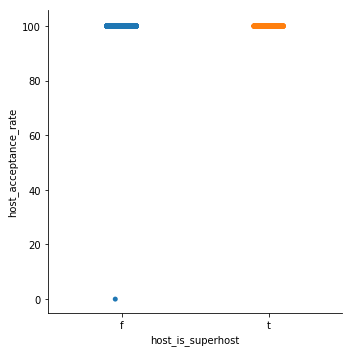

In [28]:
sns.catplot(x="host_is_superhost", y="host_acceptance_rate", data=list_final)

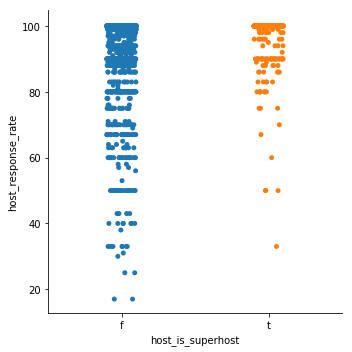

In [27]:
sns.catplot(x="host_is_superhost", y="host_response_rate", data=list_final)


       It seems that we can see that both types of hosts are open to everyone for acceptance, with one small outlier as a decline, but we see once we get to the response rate that Superhosts are far more likely to respons than non super hosts. This is important information to have, because it shows that many non-superhosts seem to do this infrequently enough that their response rates are affected. Knowing this, we would want to take good care of our superhosts, as they consisitently provide us with responses to those who wish to use AirBnB, postively affecting our relationship with our customers!
       
 # 4.4 What is the Relationship Between the Zipcodes of Seattle and Pricing?

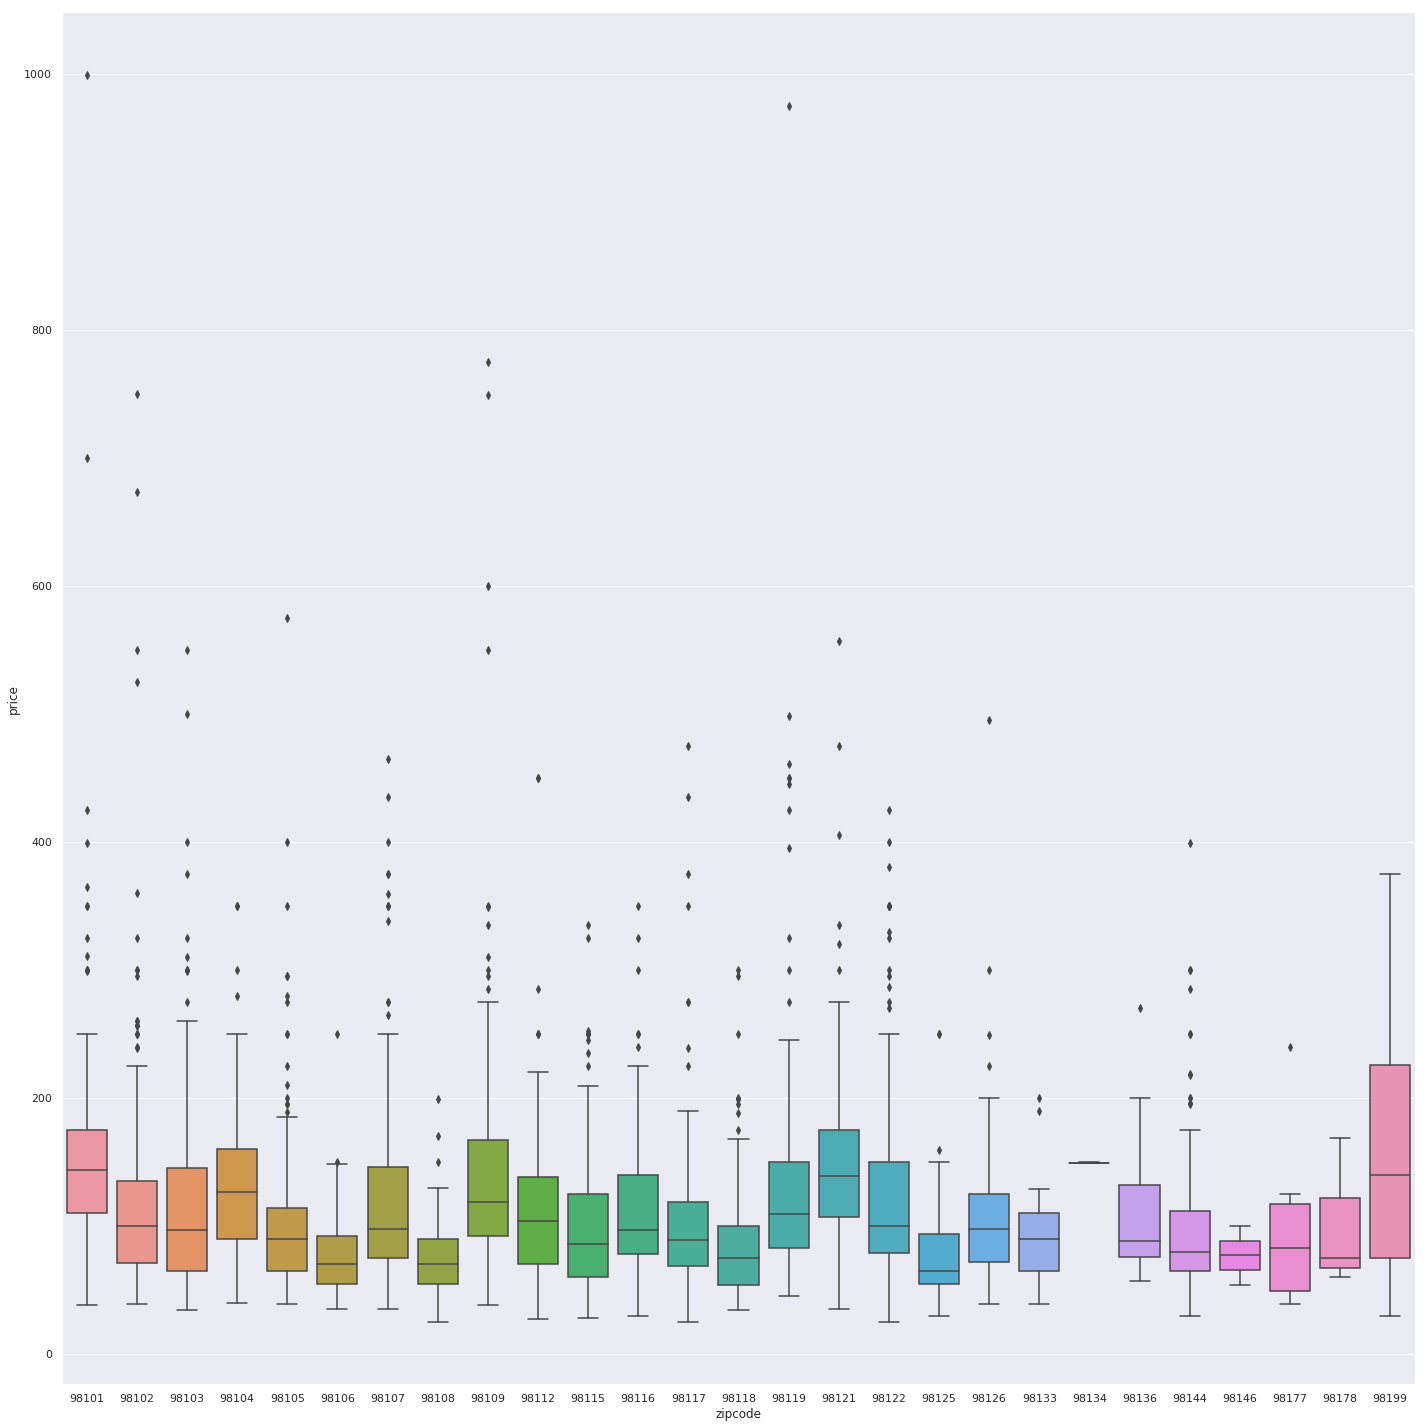

In [42]:
sns.catplot(x="zipcode", y="price", kind="box", data=list_final, height = 20);

     Here we see a good amount of data to work with, using a box plot, we can immdieatly pick out the oulietrs and this focus on long tails for our business problem. We are also aware of certain azipcodes with low counts from our data cleansing, such as 98177, 98134, 98178, 98146, which we will therefore be discounting in our analysis for lack of data. 
     What we can see clearly is that 98199, 98121 and 98108 have the longest stretching tails, with high reaching outliers and 98199 has by far the largest body. Using our business accumen, we could take this information and say that if there was one zipcode to concentrate our advertising to, it would be 98199, as there is a great range with high volume of expensive, high margin AirBnB's.
     
# 4.3 Relationships in the Review System

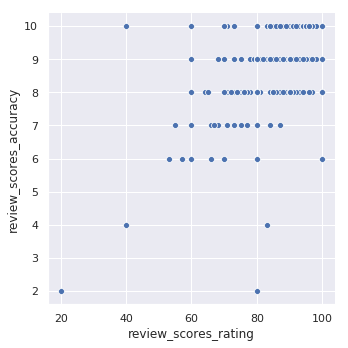

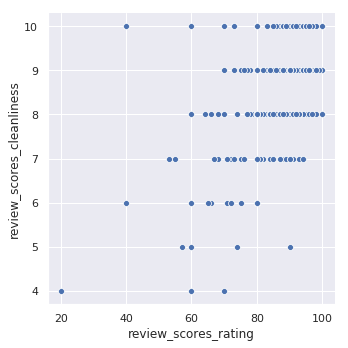

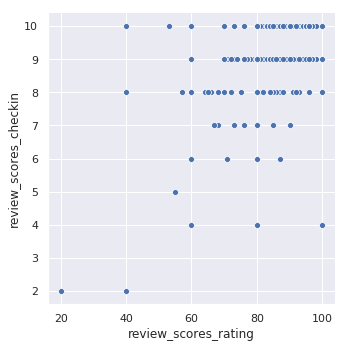

In [52]:
sns.relplot(x="review_scores_rating", y="review_scores_accuracy", data=list_final);
sns.relplot(x="review_scores_rating", y="review_scores_cleanliness", data=list_final);
sns.relplot(x="review_scores_rating", y="review_scores_checkin", data=list_final);


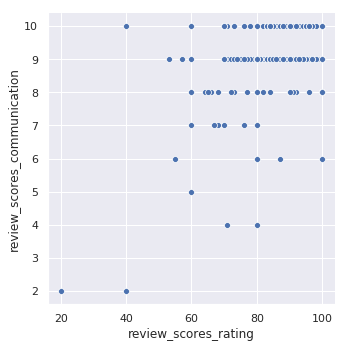

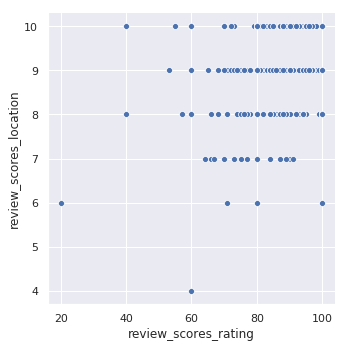

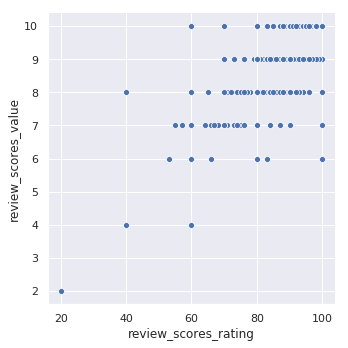

In [53]:
sns.relplot(x="review_scores_rating", y="review_scores_communication", data=list_final);
sns.relplot(x="review_scores_rating", y="review_scores_location", data=list_final);
sns.relplot(x="review_scores_rating", y="review_scores_value", data=list_final);

    Within these six charts we can see several points of note. The biggest one to take away is how similar all the factors are to one anothers, suggesting that as AirBnB our system is working as intended. The second thing to take away is that cleanliness is the biggest difference in our scores, suggesting that cleaniless might be a contributing factor that we should investigate further, as it has been ranked the lowest the most consistently. It could be that the cleanliness of hosts has impacted our sales in the long run by contributing to less than high quality stays, which we would like to change, as the less than high quality stays will lead us to be looked at as a "cheap off brand" for hotels which is not the place we want to be in, espically if we are targeting those high price high margin zipcodes

# 5. Conclusion

     Our data analysis has been excellent, we have seen several business questions posed and answered, each with their own set of conclusions. Please read my blog post where I will document our final conclusions and take aways from today's data analysis!